## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import string
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix

## Reading dataset

In [2]:
dataset=pd.read_csv('/home/job/Downloads/6th_sem/CODSOFT/spam.csv', encoding='latin-1')

## Visualizing dataset

In [3]:
dataset

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


## Updating dataset consisting of only two columns

In [4]:
dataset.dropna(how="any", inplace=True, axis=1)
dataset.columns = ['label', 'text']

In [5]:
dataset

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
dataset.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
dataset["label"].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

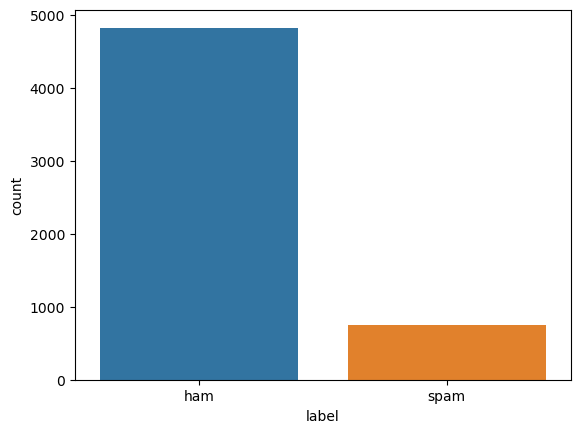

In [26]:
sns.countplot(x="label",data=dataset)
plt.show()

In [10]:
dataset['label_num'] = dataset.label.map({'ham':0, 'spam':1})
dataset.head()

,label,text,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


## Calculating the length of the text

In [11]:
dataset['message_len'] = dataset.text.apply(len)
dataset.head()

,label,text,label_num,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


## Plotting ham and spam present in the dataset

Text(0.5, 0, 'Message Length')

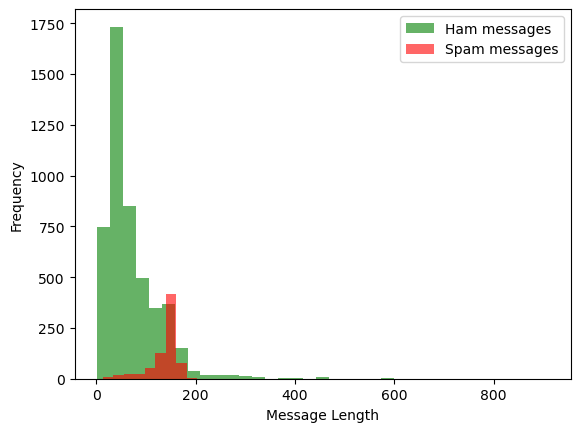

In [12]:

dataset[dataset.label=='ham'].message_len.plot(bins=35, kind='hist', color='green', 
                                       label='Ham messages', alpha=0.6)
dataset[dataset.label=='spam'].message_len.plot(kind='hist', color='red', 
                                       label='Spam messages', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")

In [13]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    
    #punctuation checking
    nopunc = [char for char in mess if char not in string.punctuation]

    nopunc = ''.join(nopunc)
    
    # Removing Stopwords
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])


## Cleaning the data

In [14]:
dataset['clean_msg'] = dataset.text.apply(text_process)
dataset.head()

,label,text,label_num,message_len,clean_msg
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,29,Ok lar Joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,Free entry wkly comp win FA Cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,0,49,dun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,Nah think goes usf lives around though


## Most common word in Ham text

In [15]:
words = dataset[dataset.label=='ham'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
ham_words = Counter()

for msg in words:
    ham_words.update(msg)
    
print(ham_words.most_common(50))

[('get', 303), ('ltgt', 276), ('ok', 272), ('go', 247), ('ill', 236), ('know', 232), ('got', 231), ('like', 229), ('call', 229), ('come', 224), ('good', 222), ('time', 189), ('day', 187), ('love', 185), ('going', 167), ('want', 163), ('one', 162), ('home', 160), ('lor', 160), ('need', 156), ('sorry', 153), ('still', 146), ('see', 137), ('n', 134), ('later', 134), ('da', 131), ('r', 131), ('back', 129), ('think', 128), ('well', 126), ('today', 125), ('send', 123), ('tell', 121), ('cant', 118), ('ì', 117), ('hi', 117), ('take', 112), ('much', 112), ('oh', 111), ('night', 107), ('hey', 106), ('happy', 105), ('great', 100), ('way', 100), ('hope', 99), ('pls', 98), ('work', 96), ('wat', 95), ('thats', 94), ('dear', 94)]


## Most common word in spam text

In [16]:
words = dataset[dataset.label=='spam'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
spam_words = Counter()

for msg in words:
    spam_words.update(msg)
    
print(spam_words.most_common(50))

[('call', 347), ('free', 216), ('txt', 150), ('mobile', 123), ('text', 120), ('claim', 113), ('stop', 113), ('reply', 101), ('prize', 92), ('get', 83), ('new', 69), ('send', 67), ('nokia', 65), ('urgent', 63), ('cash', 62), ('win', 60), ('contact', 56), ('service', 55), ('please', 52), ('guaranteed', 50), ('customer', 49), ('16', 49), ('week', 49), ('tone', 48), ('per', 46), ('phone', 45), ('18', 43), ('chat', 42), ('awarded', 38), ('draw', 38), ('latest', 36), ('å£1000', 35), ('line', 35), ('150ppm', 34), ('mins', 34), ('receive', 33), ('camera', 33), ('1', 33), ('every', 33), ('message', 32), ('holiday', 32), ('landline', 32), ('shows', 31), ('å£2000', 31), ('go', 31), ('box', 30), ('number', 30), ('apply', 29), ('code', 29), ('live', 29)]


In [17]:
X = dataset.clean_msg
y = dataset.label_num

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [18]:
vect = CountVectorizer()
vect.fit(X_train)

# learning the training data and then converting it into the document term matrix(dtm)
# X_train_dtm = vect.transform(X_train)

# equivalently: combine fit and transform into a single step
X_train_dtm = vect.fit_transform(X_train)

# examine the document-term matrix
print(type(X_train_dtm), X_train_dtm.shape)

# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)

#examining and verify that correctly transformed or not
print(type(X_test_dtm), X_test_dtm.shape)
X_train_dtm

<class 'scipy.sparse._csr.csr_matrix'> (4179, 7996)
<class 'scipy.sparse._csr.csr_matrix'> (1393, 7996)


<4179x7996 sparse matrix of type '<class 'numpy.int64'>'
	with 34796 stored elements in Compressed Sparse Row format>

## TF-IDF technique

In [19]:
tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_train_dtm)
tfidf_transformer.transform(X_train_dtm)
X_train_dtm

<4179x7996 sparse matrix of type '<class 'numpy.int64'>'
	with 34796 stored elements in Compressed Sparse Row format>

## Implementing LogisticRegression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()

# train the model using X_train_dtm
logreg.fit(X_train_dtm, y_train)

y_pred_class = logreg.predict(X_test_dtm)

# calculate predicted probabilities for X_test_dtm (well calibrated)
y_pred_prob = logreg.predict_proba(X_test_dtm)[:, 1]
y_pred_prob
acc1 = metrics.accuracy_score(y_test, y_pred_class)

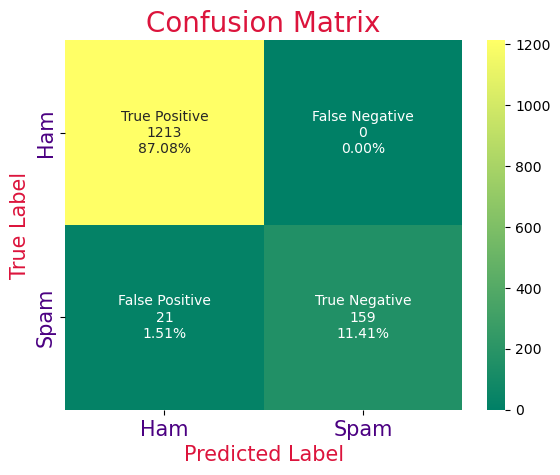

In [21]:
my_label_data=["Ham","Spam"]
my_matrix= confusion_matrix(y_test,y_pred_class)
my_label = ["True Positive","False Negative","False Positive","True Negative"]
my_label_count=["{0:0.0f}".format(value) for value in my_matrix.flatten()]
percentage=["{0:.2%}".format(value) for value in my_matrix.flatten()/np.sum(my_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(my_label,my_label_count,percentage)]
labels=np.asarray(labels).reshape(2, 2)
sns.heatmap(my_matrix, annot=labels, cmap="summer", fmt="", cbar=True,
            xticklabels=my_label_data,yticklabels=my_label_data)
plt.xlabel("Predicted Label",fontsize=15,color="crimson")
plt.ylabel("True Label",fontsize=15,color="crimson")
plt.title("Confusion Matrix",fontsize=20,color="crimson")
plt.xticks(fontsize=15,color="indigo")
plt.yticks(fontsize=15,color="indigo")
plt.show()

## Implementing Naive bayes

In [22]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train_dtm, y_train)
pred2 = bnb.predict(X_test_dtm)

acc2= accuracy_score(y_test,pred2)

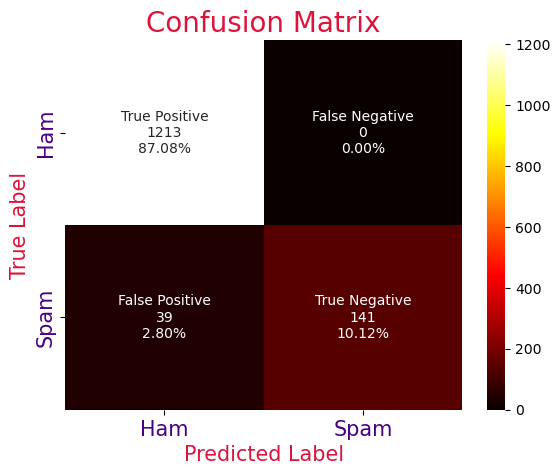

In [23]:
my_label_data=["Ham","Spam"]
my_matrix= confusion_matrix(y_test,pred2)
my_label = ["True Positive","False Negative","False Positive","True Negative"]
my_label_count=["{0:0.0f}".format(value) for value in my_matrix.flatten()]
percentage=["{0:.2%}".format(value) for value in my_matrix.flatten()/np.sum(my_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(my_label,my_label_count,percentage)]
labels=np.asarray(labels).reshape(2, 2)
sns.heatmap(my_matrix, annot=labels, cmap="hot", fmt="", cbar=True,
            xticklabels=my_label_data,yticklabels=my_label_data)
plt.xlabel("Predicted Label",fontsize=15,color="crimson")
plt.ylabel("True Label",fontsize=15,color="crimson")
plt.title("Confusion Matrix",fontsize=20,color="crimson")
plt.xticks(fontsize=15,color="indigo")
plt.yticks(fontsize=15,color="indigo")
plt.show()

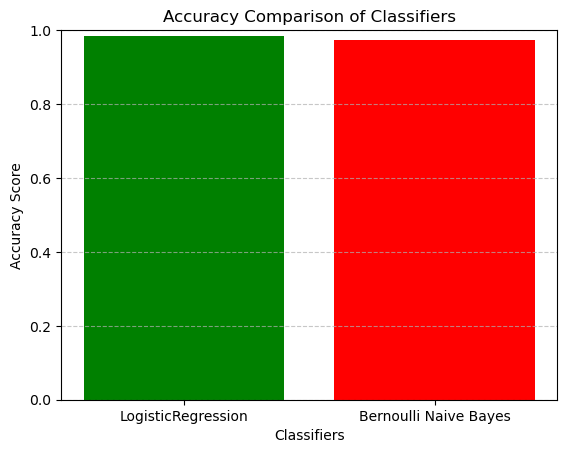

In [24]:
accuracy_scores = [acc1, acc2]
classifiers = ['LogisticRegression','Bernoulli Naive Bayes']

plt.bar(classifiers, accuracy_scores, color=['green', 'red'])
plt.xlabel('Classifiers')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Comparison of Classifiers')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 as accuracy scores are in that range
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()